#**Walmart Sales Forecasting – Project**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('Walmart DataSet.csv')
df.head()

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
0,1,05-02-2010,1643690.90,0,42.31,2.572,211.096358,8.106
1,1,12-02-2010,1641957.44,1,38.51,2.548,211.242170,8.106
2,1,19-02-2010,1611968.17,0,39.93,2.514,211.289143,8.106
3,1,26-02-2010,1409727.59,0,46.63,2.561,211.319643,8.106
4,1,05-03-2010,1554806.68,0,46.50,2.625,211.350143,8.106


In [3]:
df.shape

(6435, 8)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6435 entries, 0 to 6434
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Store         6435 non-null   int64  
 1   Date          6435 non-null   object 
 2   Weekly_Sales  6435 non-null   float64
 3   Holiday_Flag  6435 non-null   int64  
 4   Temperature   6435 non-null   float64
 5   Fuel_Price    6435 non-null   float64
 6   CPI           6435 non-null   float64
 7   Unemployment  6435 non-null   float64
dtypes: float64(5), int64(2), object(1)
memory usage: 402.3+ KB


In [5]:
# To convert the date format
df['Date'] = pd.to_datetime(df['Date'], format = '%d-%m-%Y')
df['Date'].head()

,Date
0,2010-02-05
1,2010-02-12
2,2010-02-19
3,2010-02-26
4,2010-03-05


In [6]:
# To find negative sales or extreme temperature
df.describe()

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
count,6435.000000,6435,6.435000e+03,6435.000000,6435.000000,6435.000000,6435.000000,6435.000000
mean,23.000000,2011-06-17 00:00:00,1.046965e+06,0.069930,60.663782,3.358607,171.578394,7.999151
min,1.000000,2010-02-05 00:00:00,2.099862e+05,0.000000,-2.060000,2.472000,126.064000,3.879000
25%,12.000000,2010-10-08 00:00:00,5.533501e+05,0.000000,47.460000,2.933000,131.735000,6.891000
50%,23.000000,2011-06-17 00:00:00,9.607460e+05,0.000000,62.670000,3.445000,182.616521,7.874000
75%,34.000000,2012-02-24 00:00:00,1.420159e+06,0.000000,74.940000,3.735000,212.743293,8.622000
max,45.000000,2012-10-26 00:00:00,3.818686e+06,1.000000,100.140000,4.468000,227.232807,14.313000
std,12.988182,NaN,5.643666e+05,0.255049,18.444933,0.459020,39.356712,1.875885


In [7]:
df.isnull().sum()

,0
Store,0
Date,0
Weekly_Sales,0
Holiday_Flag,0
Temperature,0
Fuel_Price,0
CPI,0
Unemployment,0


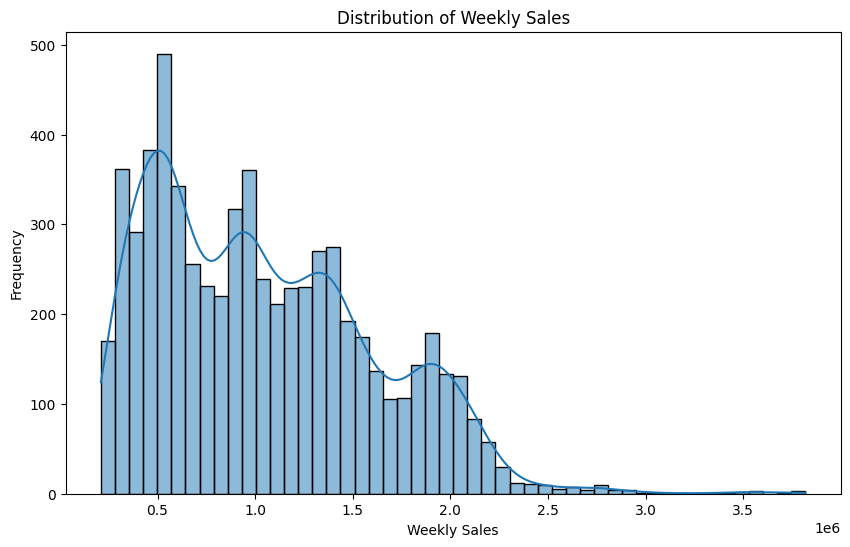

In [8]:
# To visually find the the data distribution
plt.figure(figsize=(10,6))
sns.histplot(df['Weekly_Sales'], bins=50, kde=True)
plt.title('Distribution of Weekly Sales')
plt.xlabel('Weekly Sales')
plt.ylabel('Frequency')
plt.show()

In [9]:
df['Weekly_Sales'].head()
# The X axis and Y axis in the above plot is converted values for easy understanding
# The below value is the real value

,Weekly_Sales
0,1643690.90
1,1641957.44
2,1611968.17
3,1409727.59
4,1554806.68


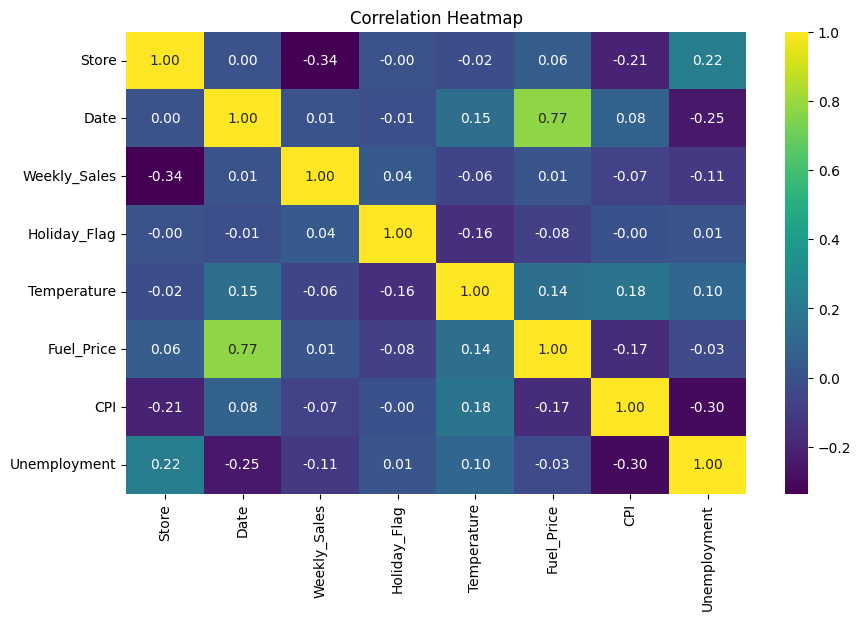

In [10]:
plt.figure(figsize=(10,6))
sns.heatmap(df.corr(), annot=True, cmap='viridis', fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()

In [11]:
# This clearly indicates there is negative impact in weekly_sales due to unpmloyment
# This indicates if the temperature is little bit low there will be chance for imporovement in sales
# In this heatmap it show very minimal impact in the fuel and weekly sales that too in positive manner
# CPI also negatively impacts the weekly_sales

###**Does unemployment affect weekly sales? If yes, which stores are most affected?**

In [12]:
# Calculate correlation between Weekly_Sales and Unemployment per store
store_corr = df.groupby('Store')[['Weekly_Sales', 'Unemployment']].corr().iloc[0::2, -1]
store_corr = store_corr.reset_index().drop(columns='level_1')
store_corr.columns = ['Store', 'Unemployment_vs_Sales_Corr']
store_corr.sort_values(by='Unemployment_vs_Sales_Corr')

,Store,Unemployment_vs_Sales_Corr
37,38,-0.785290
43,44,-0.780076
38,39,-0.384681
41,42,-0.356355
40,41,-0.350630
3,4,-0.337015
16,17,-0.263600
2,3,-0.230413
36,37,-0.221287
4,5,-0.207043


###**Do weekly sales show a seasonal trend? When and why?**

In [13]:
# Extarct month and year in the column
df['Month'] = df['Date'].dt.month
df['Year'] = df['Date'].dt.year

In [14]:
# We group the month data to find out the seasonal trend
monthly_sales = df.groupby('Month')['Weekly_Sales'].sum().reset_index()

<function matplotlib.pyplot.show(close=None, block=None)>

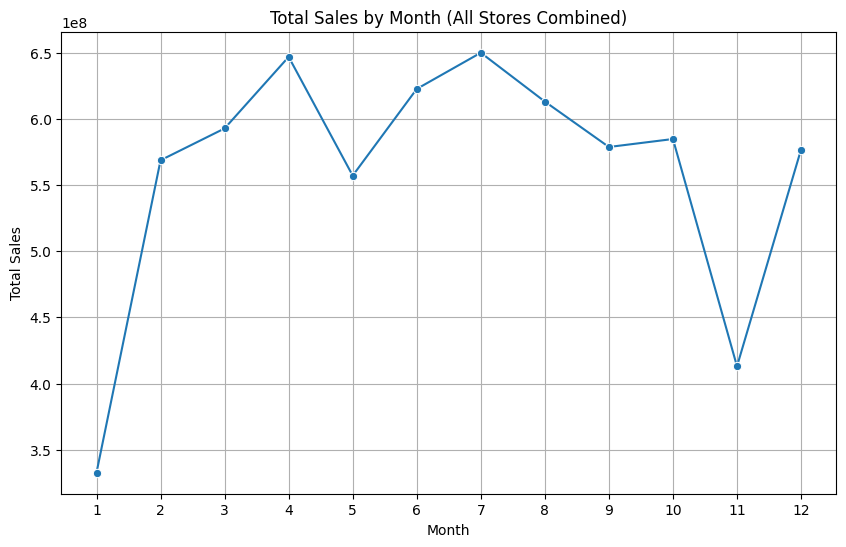

In [15]:
# Lineplot for monthly sales
plt.figure(figsize=(10,6))
sns.lineplot(data=monthly_sales, x='Month', y='Weekly_Sales', marker='o')
plt.title('Total Sales by Month (All Stores Combined)')
plt.xlabel('Month')
plt.ylabel('Total Sales')
plt.xticks(range(1,13))
plt.grid(True)
plt.show

In [16]:
# November (Month 11) and December (Month 12) show noticeable spikes.
# This indicates a clear seasonal trend, likely due to: Black Friday, Christmas shopping, Year-end bonuses and holidays

###**Does temperature affect weekly sales in any way?**

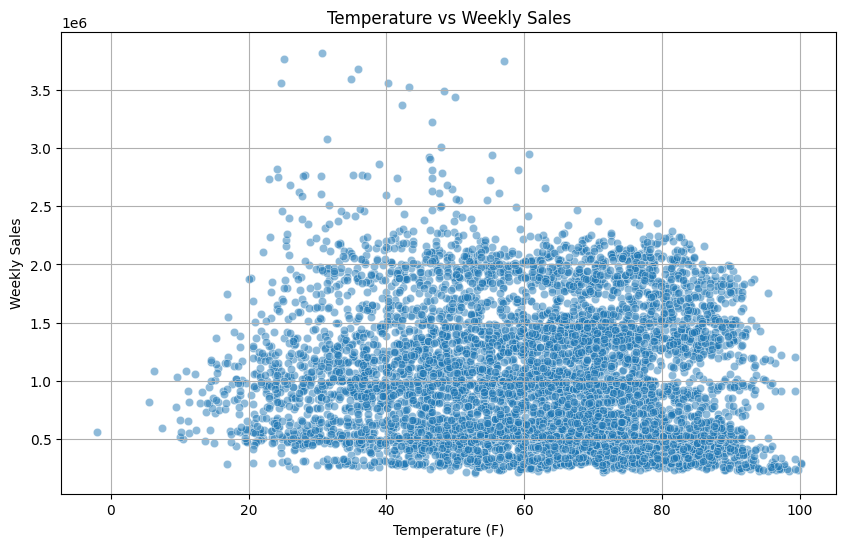

In [17]:
plt.figure(figsize=(10,6))
sns.scatterplot(data=df, x='Temperature', y='Weekly_Sales', alpha=0.5)
plt.title('Temperature vs Weekly Sales')
plt.xlabel('Temperature (F)')
plt.ylabel('Weekly Sales')
plt.grid(True)
plt.show()

In [18]:
# No strong pattern or trend - Temperature does not have a clear or direct impact on sales.
# The scatterplot is probably wide and random, meaning: Whether it's hot or cold, people still shop at Walmart.
# Temperature alone doesn’t influence total weekly sales significantly.

###**How does the Consumer Price Index (CPI) affect weekly sales of various stores?**

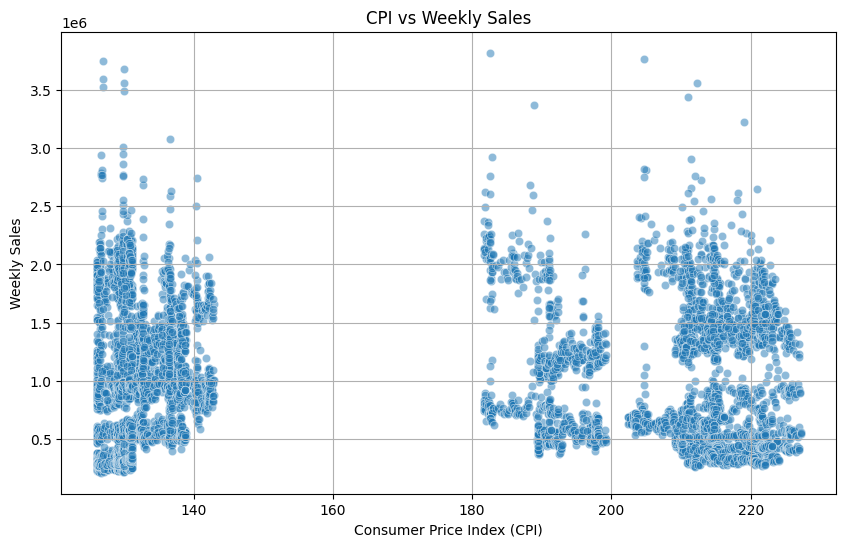

In [19]:
# Scatter Plot – CPI vs Weekly Sales
plt.figure(figsize=(10,6))
sns.scatterplot(data=df, x='CPI', y='Weekly_Sales', alpha=0.5)
plt.title('CPI vs Weekly Sales')
plt.xlabel('Consumer Price Index (CPI)')
plt.ylabel('Weekly Sales')
plt.grid(True)
plt.show()

In [20]:
# CPI does not significantly affect weekly sales from the above scatterplot
# to prove that wee will double ckeck through correlation
corr = df['CPI'].corr(df['Weekly_Sales'])
print("Correlation between CPI and Weekly Sales:", corr)

Correlation between CPI and Weekly Sales: -0.07263416204017632


###**Top-Performing Stores based on historical data**

In [21]:
# To get highest to lowest Sales data we will use groupby function
store_sales = df.groupby('Store')['Weekly_Sales'].sum().reset_index()

In [22]:
# Show top 10
top_stores = store_sales.sort_values(by='Weekly_Sales', ascending=False)
top_stores.head(10)

,Store,Weekly_Sales
19,20,3.013978e+08
3,4,2.995440e+08
13,14,2.889999e+08
12,13,2.865177e+08
1,2,2.753824e+08
9,10,2.716177e+08
26,27,2.538559e+08
5,6,2.237561e+08
0,1,2.224028e+08
38,39,2.074455e+08


In [23]:
# Store 20 made the highest total sales in the entire dataset: over $301 million
# These stores are considered the top performers based on historical total revenue

###**Which is the worst-performing store, and how big is the gap with the best?**

In [24]:
# Worst and best performing store
worst_store = top_stores.tail(1)
print('Worst Performing Stores:\n', worst_store)
best_store = top_stores.head(1)
print('\nBest Performing Store:\n', best_store)

Worst Performing Stores:
     Store  Weekly_Sales
32     33   37160221.96

Best Performing Store:
     Store  Weekly_Sales
19     20  3.013978e+08


In [25]:
# comparison of best and worst performing store
gap = best_store['Weekly_Sales'].values[0] - worst_store['Weekly_Sales'].values[0]
print(f'Difference in the Total Sales: ${gap:,.2f}')

Difference in the Total Sales: $264,237,570.50


###**Forecasting weekly sales for each store for the next 12 weeks**

In [26]:
pip install statsmodels

In [27]:
from statsmodels.tsa.arima.model import ARIMA
import warnings
warnings.filterwarnings('ignore') # This for making the output clean

In [28]:
# Summing the sales per week
store_1 = df[df['Store'] == 1]
store_1_weekly = store_1.groupby('Date')['Weekly_Sales'].sum()

<Axes: title={'center': 'Store 1 - Weekly Sales'}, xlabel='Date', ylabel='Sales'>

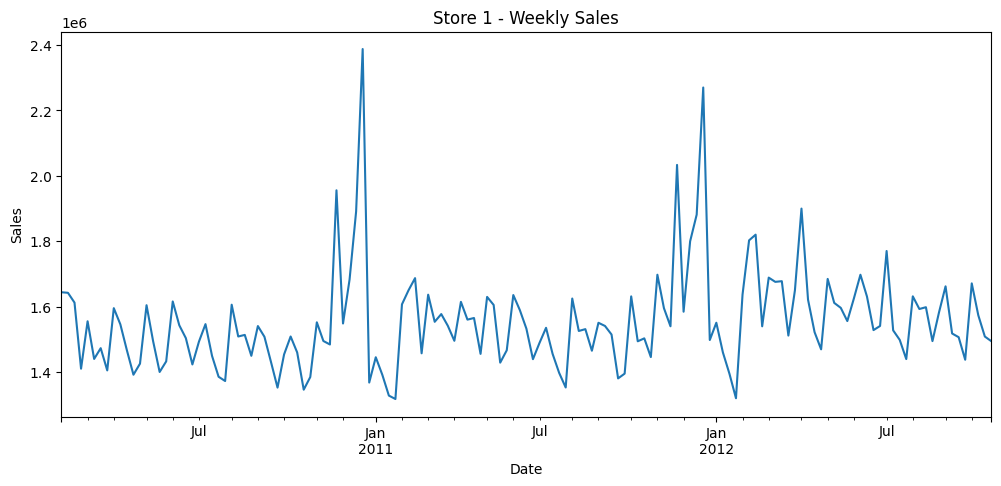

In [29]:
# Sorting by date to plot it
store_1_weekly = store_1_weekly.sort_index()
store_1_weekly.plot(figsize=(12,5), title='Store 1 - Weekly Sales', ylabel='Sales')

##**Fit ARIMA Model & Forecast Next 12 Weeks**

In [30]:
# Why ARIMA model ?
# Because the data is fairly smooth or stable

In [31]:
from statsmodels.tsa.arima.model import ARIMA
import warnings
warnings.filterwarnings('ignore')

In [32]:
# Fit ARIMA (AR=5, I=1, MA=0)
model = ARIMA(store_1_weekly, order=(5,1,0))
model_fit = model.fit()

In [33]:
# Forescast and plotting for next 12 weeks
forecast = model_fit.forecast(steps=12)

# Fixing the date value
last_date = store_1_weekly.index[-1]
forecast_index = pd.date_range(start=last_date + pd.Timedelta(weeks=1), periods=12, freq='W')
forecast = pd.Series(forecast.values, index=forecast_index)

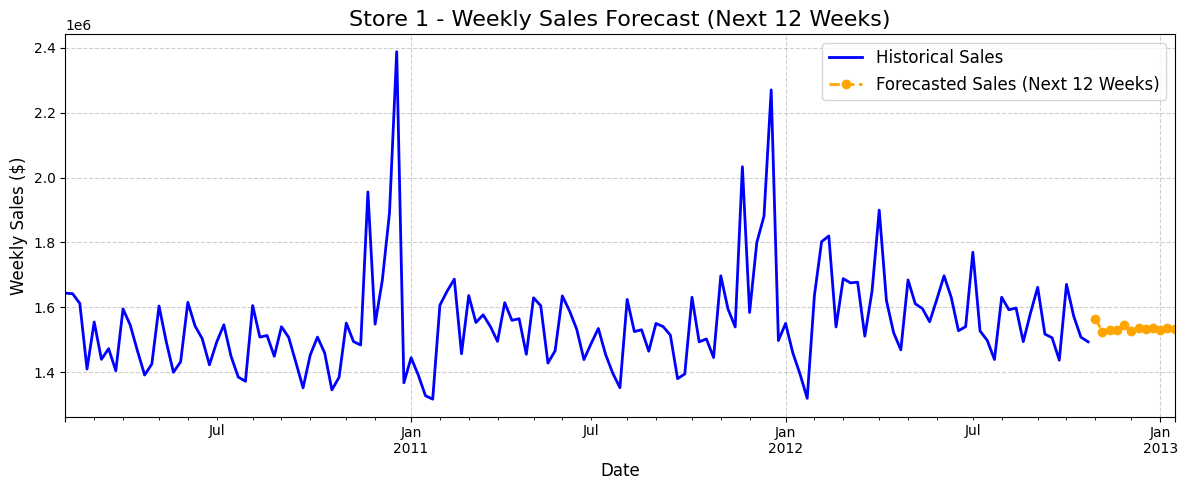

In [34]:
plt.figure(figsize=(12, 5))
store_1_weekly.plot(label='Historical Sales', color='blue', linewidth=2)
forecast.plot(label='Forecasted Sales (Next 12 Weeks)', color='orange', linestyle='--', marker='o', linewidth=2)
plt.title('Store 1 - Weekly Sales Forecast (Next 12 Weeks)', fontsize=16)
plt.xlabel('Date', fontsize=12)
plt.ylabel('Weekly Sales ($)', fontsize=12)
plt.legend(fontsize=12)
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

###**Preparing to Forcast all stores**

In [35]:
# This list will hold forecast data for each store
all_stores_forecast = []

In [36]:
# Get all unique store numbers from the dataset
store_ids = df['Store'].unique()

In [37]:
# Loop through each store to create forecasts
for store in store_ids:

# Filter data for the current store
    store_data = df[df['Store'] == store]

# Group by Date and sum weekly sales
    sales = store_data.groupby('Date')['Weekly_Sales'].sum().sort_index()

    try:
# Fit ARIMA model on the sales data
        model = ARIMA(sales, order=(5, 1, 0))
        model_fit = model.fit()

# Forecast sales for the next 12 weeks
        forecast = model_fit.forecast(steps=12)

# Create future dates for the forecast
        last_date = sales.index[-1]
        future_dates = pd.date_range(start=last_date + pd.Timedelta(weeks=1), periods=12, freq='W')

# Store results in a DataFrame
        forecast_df = pd.DataFrame({
            'Store': store,
            'Date': future_dates,
            'Forecasted_Sales': forecast
        })

# Add this store's forecast to the main list
        all_stores_forecast.append(forecast_df)
# If model fails for a store, we skip it
    except:
        print("ARIMA model failed for Store:", store)

In [38]:
# Merge all individual store forecasts into one DataFrame
final_forecast = pd.concat(all_stores_forecast, ignore_index=True)

In [39]:
# Display first few rows of the final forecast
final_forecast.head(539)

,Store,Date,Forecasted_Sales
0,1,2012-11-04,1.565441e+06
1,1,2012-11-11,1.524021e+06
2,1,2012-11-18,1.530963e+06
3,1,2012-11-25,1.530657e+06
4,1,2012-12-02,1.545705e+06
...,...,...,...
534,45,2012-12-16,7.439120e+05
535,45,2012-12-23,7.467728e+05
536,45,2012-12-30,7.429956e+05
537,45,2013-01-06,7.455520e+05


In [41]:
# According to the forecast, Store 14 is expected to generate the highest weekly sales over the next 12 weeks,
# while Store 42 may need support due to consistently lower sales projections.

###**Specific analysis and forecasting plots for 5 individual stores**

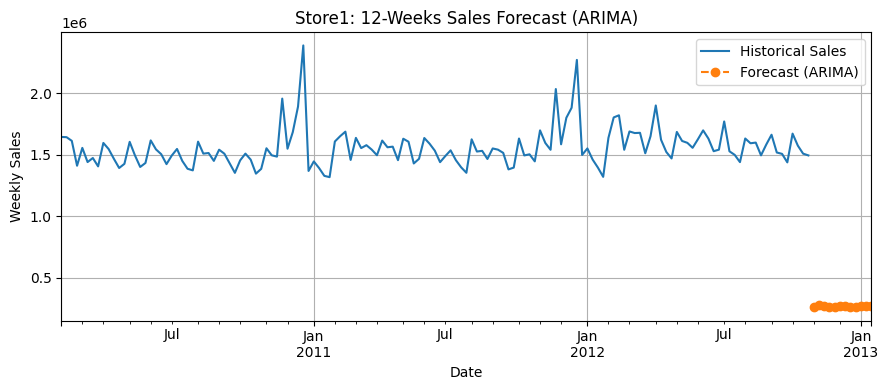

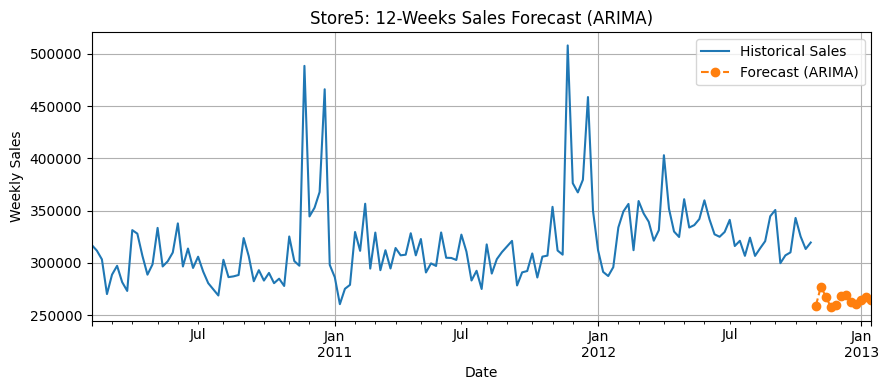

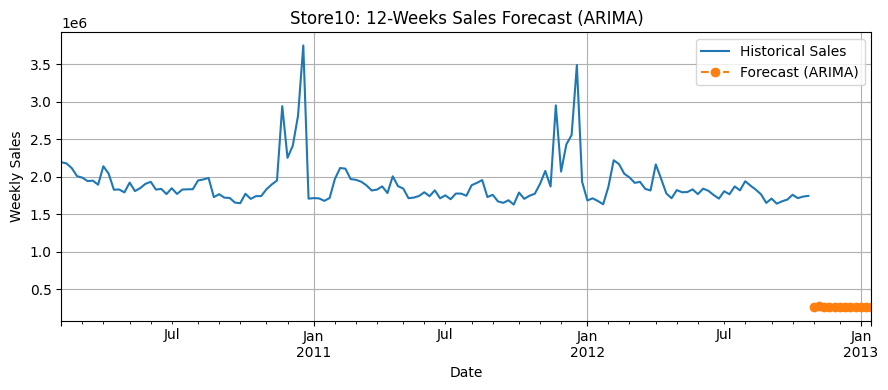

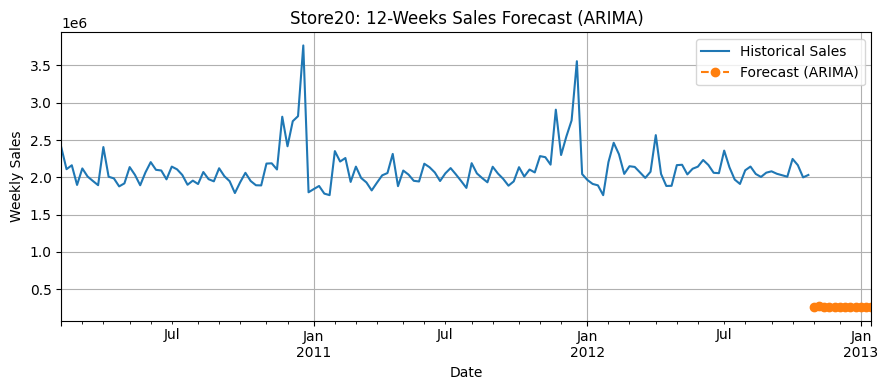

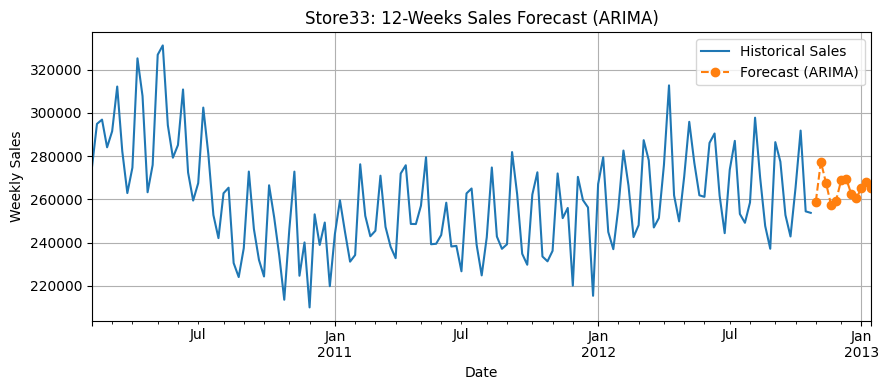

In [54]:
# List of 5 stores to highlight
selected_stores = [1, 5, 10, 20, 33]

for store_id in selected_stores:
    store_data = df[df['Store'] == store_id]
    weekly_sales = store_data.groupby('Date')['Weekly_Sales'].sum().sort_index()
# ARIMA implementation
    model = ARIMA(weekly_sales, order=(5,1,0))
    model_fit = model.fit()
    forecast = model_fit.forecast(steps=12)
#Future date fortcasting
    future_dates = pd.date_range(start=weekly_sales.index[-1]+ pd.Timedelta(weeks=1), periods=12, freq='W')
    forecast_series = pd.Series(forecast.values, index=future_dates)
# Plotting
    plt.figure(figsize=(9,4))
    weekly_sales.plot(label='Historical Sales')
    forecast_series.plot(label='Forecast (ARIMA)', linestyle='--', marker='o')
    plt.title(f'Store{store_id}: 12-Weeks Sales Forecast (ARIMA)')
    plt.xlabel('Date')
    plt.ylabel('Weekly Sales')
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()

In [55]:
print("""
Walmart Sales Forecasting - Project Summary

Project Goal:
The goal of this project was to predict weekly sales for each Walmart store using historical data and time series modeling.
In addition to general analysis, I focused on forecasting sales for 5 selected stores using the ARIMA model, as required.

Dataset Info:
- Total rows: 6435
- Number of stores: 45
- Columns used: Date, Store, Weekly_Sales, Holiday_Flag, Temperature, Fuel_Price, CPI, Unemployment

Step-by-Step Process:

1. Data Loading & Cleaning:
- Loaded the dataset and converted the Date column to datetime format.
- Checked for missing values (there were none).
- Grouped data by Store and Date for analysis and modeling.

2. Exploratory Data Analysis (EDA):
- Explored relationships between unemployment and sales; found weak but noticeable negative impact in some stores.
- Identified seasonal sales spikes in November and December, likely due to holidays like Black Friday and Christmas.
- CPI and temperature showed weak or no consistent effect on sales.
- Found the top-performing store (Store 20) and lowest-performing store (Store 33).
- Analyzed sales gaps and patterns across all stores.

3. Time Series Forecasting:
- Used ARIMA model (order = 5, 1, 0) to forecast next 12 weeks of weekly sales.
- Performed detailed forecasting for 5 selected stores: Store 1, 5, 10, 20, and 33.
- Visualized individual forecasts for each of the 5 stores.
- Also built a loop to forecast all 45 stores and saved the results into a master DataFrame.

4. Visualizations:
- Line charts were created for each of the selected 5 stores showing historical vs forecasted values.
- Bar chart used to compare total forecasted sales across all stores for the next 12 weeks.
- Forecast plots included labels, legends, and clear formatting for easy interpretation.

Conclusion:
This project helped me understand time series forecasting using ARIMA, visualizing trends, and performing store-wise analysis.
It also showed how forecasting can be applied in real business scenarios like inventory planning and performance tracking.

""")



Walmart Sales Forecasting - Project Summary

Project Goal:
The goal of this project was to predict weekly sales for each Walmart store using historical data and time series modeling.
In addition to general analysis, I focused on forecasting sales for 5 selected stores using the ARIMA model, as required.

Dataset Info:
- Total rows: 6435
- Number of stores: 45
- Columns used: Date, Store, Weekly_Sales, Holiday_Flag, Temperature, Fuel_Price, CPI, Unemployment

Step-by-Step Process:

1. Data Loading & Cleaning:
- Loaded the dataset and converted the Date column to datetime format.
- Checked for missing values (there were none).
- Grouped data by Store and Date for analysis and modeling.

2. Exploratory Data Analysis (EDA):
- Explored relationships between unemployment and sales; found weak but noticeable negative impact in some stores.
- Identified seasonal sales spikes in November and December, likely due to holidays like Black Friday and Christmas.
- CPI and temperature showed weak or 